#Import Libraries


In [ ]:
pip install transformers==3

     |████████████████████████████████| 757kB 20.5MB/s 
     |████████████████████████████████| 1.2MB 45.8MB/s 
     |████████████████████████████████| 890kB 52.3MB/s 
     |████████████████████████████████| 3.0MB 45.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=8b0108dfeb004b6a34c0ef9119a1328bf63f6f69df5749cdd502859cd184c3bc
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:

# Libraries

import matplotlib.pyplot as plt
import pandas as pd
import torch

# Preliminaries

from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

# Models
import torch
from torch.utils.data import DataLoader, Dataset
device = torch.device('cuda:0')
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification
# Training

import torch.optim as optim

# Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [ ]:
!pip install contractions
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import contractions
import re
import torch
import transformers as ppb
import warnings
import logging
logging.basicConfig(level=logging.ERROR)
warnings.filterwarnings('ignore')


#from transformers import BertModel, BertConfig,BertTokenizer

     |████████████████████████████████| 266kB 32.1MB/s 
     |████████████████████████████████| 327kB 47.4MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=85248 sha256=f4089ab2b1fdcc7007329db147da500d6a54c198af82977fe7af29527b7b7e60
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


# Load Data/ Git Clone

In [ ]:
!git clone https://github.com/YasaminAbbaszadegan/NLP_Forum_Recomendation_Engine.git


fatal: destination path 'NLP_Forum_Recomendation_Engine' already exists and is not an empty directory.


In [ ]:
cd /content/NLP_Forum_Recomendation_Engine/Dataset


[Errno 2] No such file or directory: '/content/NLP_Forum_Recomendation_Engine/Dataset'
/content/gdrive/MyDrive/Stemaway/Module4_notebook


In [ ]:
df=pd.read_csv('tudiabetes_20.csv',index_col=0)

#Preprocess 

In [ ]:
def remove_braket(x):
  x['Tags'] = x['Tags'].str.replace("[", "")
  x['Tags'] = x['Tags'].str.replace("]", "")
  x['Tags'] = x['Tags'].str.replace("'", "")
  x['Post Replies'] = x['Post Replies'].str.replace("[", "")
  x['Post Replies'] = x['Post Replies'].str.replace("]", "")
  x['Post Replies'] = x['Post Replies'].str.replace("'", "")
  x = x[x.Category != 'Social Clubs']
  x = x[x.Category != 'TuDiabetes Website']
  x = x[x.Category != 'Welcome']
  return x.reset_index(drop=True)
df=remove_braket(df)
df['comment_topic'] = df['Topic Title'] + ' ' + df['Tags'] + ' ' + df['Leading Post'] + ' ' + df['Post Replies']

In [ ]:
df_cat=df.copy()

In [ ]:
def clean_text(text):
    #Make text lowercase, remove punctuation and remove words containing numbers.
    # text=re.sub("[\(\[].*?[\)\]]", "",text)
    text=re.sub(r'#\w+ ?', '', text ) ## remove hashtag words
    text = re.sub('<.*?>','', text)
    text = re.sub('\n',' ', text)
    text = re.sub('\\n',' ', text)
    text = text.lower()
    # text = re.sub('[%s]' % re.escape(string.punctuation), '',text)#remove punctuation
   # Get rid of some additional punctuation.
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(' — ', '', text)
    return (text)
# clean = lambda x: clean_text(x)

def full_clean(s):
  df = s.apply(lambda x: [contractions.fix(word) for word in str(x).split()])
  df= df.map(lambda x: ' '.join(x))
  df=df.apply(lambda x: clean_text(x))
  # df = df.apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))## wont remove stop words bc they give context to the corpus
  
  return(pd.DataFrame(df))
df_cat['comment_topic_C'] =full_clean(df['comment_topic'])


In [ ]:
my_categories = [ 'Type 1 and LADA',
'Type 2', 'Diabetes and Pregnancy', 'Community', 'Food',
'Treatment', 'Diabetes Technology']
new_DF = pd.DataFrame()

new_DF['comment_topic'] = df_cat['comment_topic_C'].apply(lambda x: str(x))
new_DF['Category'] = df_cat['Category'].apply(lambda x: str(x))

# changing class names (text) to numbers (a necessity for simpletransformers library)
new_DF['Category'] = new_DF.apply(lambda x:  my_categories.index(x['Category']),axis=1)

#Shorten text

BERT has the limitation of inputting longer than a few hundred words
max_length=512

https://medium.com/analytics-vidhya/text-classification-with-bert-using-transformers-for-long-text-inputs-f54833994dfd

One of the limitations of BERT is on the application when you have long inputs because, in BERT, the self-attention layer has a quadratic complexity O(n²) in terms of the sequence length n (see this link). In this post, I followed the main ideas of this paper in order to know how to overcome this limitation, when you want to use BERT over long sequences of text.

In this article as the [paper](https://arxiv.org/abs/1910.10781) suggests, we are going to segment the input into smaller text and feed each of them into BERT, it means for each row, we will split the text in order to have some smaller text (200 words long each )
We must split it into a chunk of 200 words each, with 50 words overlappedApplying this function to the review_text column of the dataset would help us get the dataset where every row has a list of string of around 200-word length.


In [ ]:
def get_split(text1):
  l_total=[]
  l_partial=[]
  if len(text1.split())//150>0:
    n=len(text1.split())//150
  else:
    n=1
  for w in range(n):
    if w==0:
      l_partial=text1.split()[:200]
      l_total.append(" ".join(l_partial))
    else:
      l_partial=text1.split()[w*150:w*150+200]
      l_total.append(" ".join(l_partial))
    return l_total[0]

In [ ]:
new_DF['comment_topic']=new_DF['comment_topic'].apply(get_split)

In [ ]:
new_DF.head()

,comment_topic,Category
0,type 1 diabetes resources information on this ...,0
1,about the type 1 and lada category the type 1 ...,0
2,are you concerned about covid-19 vaccine might...,0
3,covid vaccine - are you getting it? hello! i w...,0
4,bolusing for pasta - big fail how do you guys ...,0


In [ ]:
new_DF.Category.nunique()

7

In [ ]:
token_lens = []
for txt in new_DF['comment_topic']:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

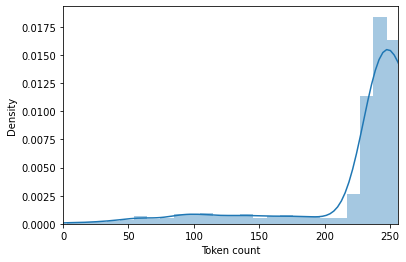

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');




# Train_Test_Split




In [ ]:
df_train, df_test = train_test_split(new_DF, test_size=0.1, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [ ]:
df_train.head()

,comment_topic,Category
557,freestyle libre 14day accuracy? hi i am thinki...,1
650,running high (is there such a thing?) it is be...,1
3386,tandem control-iq review! (artificial pancreas...,6
1200,heparin and bg? managing pregnancy with diabet...,2
2309,has anyone tried oopsies as an alternative to ...,4


#BERT Model & Tokenizer

In [ ]:
# the model we gonna train, base uncased BERT
model_name = "bert-base-uncased"
# max sequence length for each document/sentence sample
max_length = 250
#load Bert classification model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=7).to("cuda")
# load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)
# tokenize the dataset, truncate when passed `max_length`, 
# and pad with 0's when less than `max_length`
train_encodings = tokenizer(df_train['comment_topic'].tolist(), truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(df_val['comment_topic'].tolist(), truncation=True, padding=True, max_length=max_length)

#Torch dataset

In [ ]:
class torchDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = torchDataset(train_encodings, df_train['Category'].tolist())
valid_dataset = torchDataset(valid_encodings, df_val['Category'].tolist())

In [1]:
# train_encodings

In [2]:
# train_dataset.encodings

#Mount to Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Stemaway/Module4_notebook

/content/gdrive/MyDrive/Stemaway/Module4_notebook


#Computer metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  # precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc
      # 'f1': f1,
      # 'precision': precision,
      # 'recall': recall
  }

#TrainingArgument

In [ ]:
training_args = TrainingArguments(
    # report_to = 'wandb',
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    # load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=200,               # log & save weights each logging_steps
    # evaluation_strategy="steps",
        # evaluate each `logging_steps`
    
)

#Trainer

In [ ]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [ ]:
# train the model
%%time
trainer.train()



CPU times: user 3min 42s, sys: 3min 29s, total: 7min 11s
Wall time: 7min 17s


TrainOutput(global_step=594, training_loss=0.9826658572938908)

#Trainer.evaluate()

In [ ]:
%%time
# evaluate the current model after training
trainer.evaluate()


CPU times: user 1.33 s, sys: 1.3 s, total: 2.63 s
Wall time: 2.64 s


{'epoch': 3.0,
 'eval_accuracy': 0.7371428571428571,
 'eval_loss': 0.7377460996309916}

#Save Trained Model

In [ ]:
# saving the fine tuned model & tokenizer
model_path = "content/NLP_Forum_Recomendation_Engine/model_saved"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('content/NLP_Forum_Recomendation_Engine/model_saved/vocab.txt',
 'content/NLP_Forum_Recomendation_Engine/model_saved/special_tokens_map.json',
 'content/NLP_Forum_Recomendation_Engine/model_saved/added_tokens.json')

#Reload Saved Trained Model

In [ ]:

# saving the fine tuned model & tokenizer
model_path = "content/NLP_Forum_Recomendation_Engine/model_saved"
# retreive the saved model 
model = BertForSequenceClassification.from_pretrained(model_path , 
                                                        local_files_only=True)

model.to('cuda')

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
# load the tokenizer
tokenizer = BertTokenizer.from_pretrained(model_path , 
                                                        local_files_only=True, do_lower_case=True)

#Get_Recommendations

In [ ]:
max_length=250
my_categories = [ 'Type 1 and LADA',
'Type 2', 'Diabetes and Pregnancy', 'Community', 'Food',
'Treatment', 'Diabetes Technology']
def Get_Recommendations(text,n):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    p=probs.tolist()[0]

    for i in probs.argsort(descending=True).tolist()[0][:n]:
      
      print(my_categories[i],round(p[i], 4))
      print('https://forum.tudiabetes.org/c/'+my_categories[i].lower().strip().replace(' ', '-'))


In [ ]:
text = """
I love Dexcom, I have been using it since September.
I got G5.There are some things I like about it and some not yet.
Also, Dexom just released newupdate for iPhone allowing almost full Apple Watch Integration, cant beat that
"""
print(Get_Recommendations(text,n=3))

Diabetes Technology 0.9993
https://forum.tudiabetes.org/c/diabetes-technology
Type 1 and LADA 0.0006
https://forum.tudiabetes.org/c/type-1-and-lada
Type 2 0.0
https://forum.tudiabetes.org/c/type-2
None


In [ ]:




text = """
My uncle just found out he has diabetes. he is visiting me tomorrow and I dont know what to serve dinner? does anyone have any diabetes friendly recipe suggestions?

"""
print(Get_Recommendations(text,n=3))

Food 0.9996
https://forum.tudiabetes.org/c/food
Type 2 0.0001
https://forum.tudiabetes.org/c/type-2
Community 0.0001
https://forum.tudiabetes.org/c/community
None


In [ ]:
text = """
I have high blood suger and my doctor told me I have Type 1 diabetes. What should I avoid. Any tips on good diets and recipes?
"""
print(Get_Recommendations(text,n=3))

Food 0.9995
https://forum.tudiabetes.org/c/food
Type 2 0.0003
https://forum.tudiabetes.org/c/type-2
Type 1 and LADA 0.0
https://forum.tudiabetes.org/c/type-1-and-lada
None


In [ ]:



text = """
Coming up on officially 4 years since my last new pump, a 670G that sucked so bad it went back into its box in my D drawer and hasn’t been out since. I reverted to my good old reliable pager-style Paradigm 723 and G6, and my A1Cs have been in the 5.8-6.3 range. But my 670G warranty expires in March, so of course I’m getting pinged by Medtronic and Tandem both about signing up for a shiny new replacement. Part of me just instinctively says “Oh goody, new D tech, let’s go!” Kinda like buying a new car.

EXCEPT, when I think about it I’m just kind of un-thrilled about either choice. Partly I think it’s because my experience with the 670 soured me on the whole AID (Automated Insulin Delivery) experience. Here’s what’s been running through my mind at the prospect:

Medt:
+Pluses/-Minuses

+Free upgrade to 780 (when it’s released) lets you set a lower algorithm target now (100, vs 120 for the 670)
+I’m used to how Mdt does things, including reservoir & Mio insets.
+Whole new algorithm, supposedly better than 670.
-Guardian Sensor (new CGM might be better, but it’s still in development)
-No longer talks to ContourNext!!! Have to switch to less accurate BG meter. Why did they do this??? This may be the deal-breaker, oddly enough. You have to calibrate Guardians 2x/day.
Tandem
Pluses/questions

Control-IQ. People seem to like it, but more recently I’ve been seeing gripes from people who were already getting low-6 AICs and aren’t happy with results on this system. Fixed target isn’t flexible enough. Can anyone comment/confirm?
Rube-goldbergian reservoir/inset system. Changing sets seems like a PIA, unless it’s compensated by other advantages.
AID in general:

We locked up your pump! Just trust the algorithm! Doesn’t work so good? Oh well. That was my feeling about the 670, anyway. Does anyone feel like that’s no longer operative? Especially interested to hear from anyone who was getting ~6 A1Cs before going on Control IQ and is still satisfied!
"""
print(Get_Recommendations(text,n=3))

Diabetes Technology 0.9998
https://forum.tudiabetes.org/c/diabetes-technology
Community 0.0
https://forum.tudiabetes.org/c/community
Treatment 0.0
https://forum.tudiabetes.org/c/treatment
None


In [ ]:
text = """
I have started a Dexcom Users Group and posted an introductory discussion. 
If you use a Dexcom CGM or are interested in learning about it, please join the group. 
There is a Dexcom group on another site with over 200 members. The site itself is smaller than DD. 
I think we should be able to have a good Dexcom group here on DD. 
The Dexcom is a great CGM and is scheduled to integrate with both the Animas and Omnipod pumps later this year. 
We need experienced users to help answer questions. Please join our Dexcom Users Group.
"""
print(Get_Recommendations(text,n=3))

Diabetes Technology 0.9999
https://forum.tudiabetes.org/c/diabetes-technology
Diabetes and Pregnancy 0.0
https://forum.tudiabetes.org/c/diabetes-and-pregnancy
Community 0.0
https://forum.tudiabetes.org/c/community
None


In [ ]:
text = """
Just a reminder. When I was using the Guardian 3 CGM with a 630G, you were required to calibrate every 6 hours for the first 4 (I think) calibrations immediately after the initial sensor warm-up. Calibrations were every 12 hours only after this roughly first 24 hours of more frequent calibrations.

I assume this was because the sensor had still not reached a sufficient equilibrium and needed more frequent calibrations to stay on track. I found this annoying, sure. But my primary goal was to be able to trust my CGM results so I just worked with it.

Maybe it will be different with the 770G. I have not seen any feedback about this from 770G users so I just don’t know one way or another."""
print(Get_Recommendations(text,n=3))

Diabetes Technology 0.9992
https://forum.tudiabetes.org/c/diabetes-technology
Type 1 and LADA 0.0006
https://forum.tudiabetes.org/c/type-1-and-lada
Community 0.0001
https://forum.tudiabetes.org/c/community
None


In [ ]:
text = """
So, Im new here to the whole website…just wanted to share my story…I’m a Type 1 with a perfectly healthy 4 year old son. 
Im trying to get my A1c to an acceptable level to have baby number 2! Any suggestions? 
My sugars were the best they’ve ever been while i was pregnant with Brandon (the 4 yr old)…he was a surprise…when i found out i was pregnant my a1c was a whopping 13. 
Needless to say we got EXTREMELY lucky with him. During my pregnancy my a1c never went over 6. 
it was amazing. I’m trying to get my lazy butt back to the gym, and start checking my sugar more…i was just wondering what everyone else was doing to prepare???
"""
print(Get_Recommendations(text,n=3))

Diabetes and Pregnancy 0.9999
https://forum.tudiabetes.org/c/diabetes-and-pregnancy
Community 0.0
https://forum.tudiabetes.org/c/community
Diabetes Technology 0.0
https://forum.tudiabetes.org/c/diabetes-technology
None


In [ ]:
#https://forum.tudiabetes.org/t/libre-2-are-they-accurate/86305
text = """

I just started using the Libre 2 system. I frequently get results 50 to 70 points different from finger sticks. Are others experiencing the same situation?
"""
print(Get_Recommendations(text,n=3))

Type 2 0.9023
https://forum.tudiabetes.org/c/type-2
Treatment 0.044
https://forum.tudiabetes.org/c/treatment
Diabetes Technology 0.0379
https://forum.tudiabetes.org/c/diabetes-technology
None


In [ ]:
#https://forum.tudiabetes.org/t/new-beyond-type-2-app/86236
text = """

Have you checked out the Beyond Type 2 Community - a new app and online community for everyone with Type 2 diabetes to connect?

Together, we’re building a safe space to share ideas, stories, resources, and perspectives in English and Spanish, for not only living with T2D but thriving with it.

Download the Beyond Type 2 App from your mobile App Store or access it on any browser at community.beyondtype2.org 3.

Please let me know if you have any questions!"""
print(Get_Recommendations(text,n=3))

Type 2 0.9998
https://forum.tudiabetes.org/c/type-2
Community 0.0
https://forum.tudiabetes.org/c/community
Type 1 and LADA 0.0
https://forum.tudiabetes.org/c/type-1-and-lada
None


In [ ]:
#https://forum.tudiabetes.org/t/libre-2-are-they-accurate/86305
text = """

I’m just sort of introducing myself and hope to hear others’ experiences. I was diagnosed with T2 in 2005. 
I started doing Dr. Richard Bernstein’s diet right away and lowered my a1c to 5.7. I was not on medication all those years until now, 
just doing low carb and able to keep my a1c decent, 
though never where I wanted it to be. It has been anywhere from 6 to 6.7,
depending. Having gone through a lot of grief, loss, and stress over the years set me back, 
and gradually it seemed it was harder and harder to keep blood sugars in a good range. 
My fasting bg has been climbing higher and my pp bg is higher in spite of eating low carb usually. 
I tried metformin but after a month of feeling like I had a stomach flu every day I decided this was not going to get better and was not liveable. I asked my doctor if she would prescribe a fast acting insulin for meals and she did. I’m on Humalog on a sliding scale. Most of the time I just need it for morning breakfast. But even eating 10g carbs per meal or less I find I often need some with my meal or it climbs and does not go back down after 2 hours like it used to. I walk 30 min. a day sometimes 2 or 3 times a day, after each meal. I only had one serious hypo which was the first time I actually used the Humalog. I made the mistake of doing a brisk walk after taking it before it was done working and my bg dropped to 49. I was able to quickly bring it back up to normal with glucose tabs. I’m used to how it all affects my body now so I don’t have hypos, and I’m more careful about timing my exercise. Sometimes I can skip the humalog and just do the walk.
So anyway, that’s my story. I’ve been reading some of the posts for a while and find it very interesting how different everyone’s experiences are!"""
print(Get_Recommendations(text,n=3))

Type 2 0.9998
https://forum.tudiabetes.org/c/type-2
Community 0.0
https://forum.tudiabetes.org/c/community
Type 1 and LADA 0.0
https://forum.tudiabetes.org/c/type-1-and-lada
None


In [ ]:
#https://www.diabetes.co.uk/forum/threads/pregnant-with-non-diabetic-reactive-hypoglycaemia.180045/
text = """
Hello everyone,

Has anyone been pregnant with this? As I’m currently pregnant and monitored my blood sugar for two weeks at around eight weeks which was all fine, I’ve got to monitor again when I get to 28 weeks to check for gestational diabetes and I’ve been trying to avoid sugar as much as I can but sometimes I just want a brownie. Would there be any damage done to the baby from the occasional low?

I’ve not had a lot of support from the midwives, not through any fault of their own but they’d never even heard of this before and the diabetes team didn’t seem to know much about it either so I’d love to speak to anyone who’s been through pregnancy with it."""
print(Get_Recommendations(text,n=3))

Diabetes and Pregnancy 0.9998
https://forum.tudiabetes.org/c/diabetes-and-pregnancy
Treatment 0.0001
https://forum.tudiabetes.org/c/treatment
Community 0.0001
https://forum.tudiabetes.org/c/community
None


In [ ]:
text = """
Hoping to gain some knowledge from all your insights into which are the best times of day to do light/moderate exercise - indoor upright bike or walking. Aiming not to stimulate appetite or raise glucose levels. So what is optimum in your experience.
I haven't yet tested before and after exercise just in relation to meals. Thanks to all who contribute to my learning."""

print(Get_Recommendations(text,n=3))

Type 2 0.9885
https://forum.tudiabetes.org/c/type-2
Treatment 0.0106
https://forum.tudiabetes.org/c/treatment
Community 0.0006
https://forum.tudiabetes.org/c/community
None


In [ ]:
text = """
Hi all, I’m considering loading up an old pump with symlin. 
I am already pumping insulin. My question: do people really think it is necessary to have TWO sites- one for insulin and one for symlin? 
Would it be possible to just bolus the symlin through the same site? (and yes, I know they aren’t SUPPOSED to be mixed…) Any thoughts would be appreciated. 
Thanks,Ruth"""
print(Get_Recommendations(text,n=3))

Type 1 and LADA 0.999
https://forum.tudiabetes.org/c/type-1-and-lada
Type 2 0.0
https://forum.tudiabetes.org/c/type-2
Community 0.0
https://forum.tudiabetes.org/c/community
None


In [ ]:
text="""My insurance will no longer cover Humalog. 
Instead they will cover Insulin Lispro, the generic form. Has anyone used it?How did it work out?"""

print(Get_Recommendations(text,n=3))

Type 1 and LADA 1.0
https://forum.tudiabetes.org/c/type-1-and-lada
Type 2 0.0
https://forum.tudiabetes.org/c/type-2
Community 0.0
https://forum.tudiabetes.org/c/community
None


In [ ]:
text="""Don’t you think nuts get a bad wrap as being “High Fat” ?? 
They are not saturated fats since they come from a plant source. 
I tried to become a vegetarian a few years back and found that it was very expensive. 
I am sure you know how to work around it. My husband and I are involved in animal welfare organizations and have considered giving up meat. 
We really need to educate ourselves on this issue. Do you recommend any books or magazines???"""
print(Get_Recommendations(text,n=3))

Food 0.999
https://forum.tudiabetes.org/c/food
Type 2 0.0
https://forum.tudiabetes.org/c/type-2
Community 0.0
https://forum.tudiabetes.org/c/community
None


In [ ]:

text="""yes, i always bring with me at least 18g of carbs for the 90minute Bikram Yoga class…and i love the shot blocks,they are great, however they are expensive…so i have been going to the local Walgreens and buying the large sized “orange candy things”…i dont know the name of them, will look later…but they are chewy and they have sugar coated on the outside, they only cost $1 for the whole pack…i keep them in my gym back and always carry three of them with me b4 class…i set them out of sight by my water bottle and usually sit near a wall(i am not a great yogi)…and also where a pump, then every 20min, when i drink water, grab the candy…love the Bikram Yoga, and the flexibility i get"""
print(Get_Recommendations(text,n=3))

Food 0.974
https://forum.tudiabetes.org/c/food
Community 0.0102
https://forum.tudiabetes.org/c/community
Type 2 0.006
https://forum.tudiabetes.org/c/type-2
None


In [ ]:

text='My insurance will no longer cover Humalog. Instead they will cover Insulin Lispro, the generic form. Has anyone used it?How did it work out?'

print(Get_Recommendations(text,n=3))

Type 1 and LADA 0.9996
https://forum.tudiabetes.org/c/type-1-and-lada
Type 2 0.0002
https://forum.tudiabetes.org/c/type-2
Community 0.0001
https://forum.tudiabetes.org/c/community
None


In [ ]:

text='For those of you that have experienced the honeymoon phase of type 1, what kind of increase in your total daily insulin dose did you see? Did you start out after diagnosis injecting a small amount of insulin and then notice a marked increase when the honeymoon was over? I started injecting approximately 5-10 units a day at diagnosis and now I’m up to about 30 units a day. I realize this is not an exact science, but I’d like to compare with others to see if I’m close to the end of the honeymoon, or if there’s still a ways to go.'

print(Get_Recommendations(text,n=3))

Type 1 and LADA 0.9928
https://forum.tudiabetes.org/c/type-1-and-lada
Type 2 0.0042
https://forum.tudiabetes.org/c/type-2
Treatment 0.0015
https://forum.tudiabetes.org/c/treatment
None


In [ ]:

text='Do any members have experience with eating a High Fiber Diet to keep blood sugars more stabilized???'

print(Get_Recommendations(text,n=3))

Food 0.996
https://forum.tudiabetes.org/c/food
Community 0.0033
https://forum.tudiabetes.org/c/community
Type 2 0.0004
https://forum.tudiabetes.org/c/type-2
None


In [ ]:
text='can I eat fatty lunch?? or fruits that are high in sugar?'

print(Get_Recommendations(text,n=3))

Food 0.9982
https://forum.tudiabetes.org/c/food
Type 2 0.0015
https://forum.tudiabetes.org/c/type-2
Type 1 and LADA 0.0001
https://forum.tudiabetes.org/c/type-1-and-lada
None
